In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(1,'C:/Users/nishant/HackerEarth Competition/src/')
import config


In [2]:
df=pd.read_csv(config.TRAINING_FILE)
df=df.drop(columns=['Unnamed: 0'])
df

,user_id,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,...,40,41,42,43,44,45,46,47,48,49
0,fffe3100,27,66.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fffe3200,26,68.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fffe3300,20,69.0,37.804456,-122.271356,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fffe3400,27,68.0,37.690483,-122.472671,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fffe3500,22,68.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,fffe3100390039003700,24,69.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,fffe3100390039003800,23,68.0,37.779026,-122.419906,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,fffe3100390039003900,28,71.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,fffe3200300030003000,32,68.0,37.779026,-122.419906,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns


Index(['user_id', 'age', 'height', 'language', 'bio', 'latitude', 'longitude',
       'Dogs', 'Cats', 'status_available',
       ...
       'other_interests_reading', 'other_interests_singing',
       'other_interests_sketching', 'other_interests_social_networking',
       'other_interests_sports', 'other_interests_studying',
       'other_interests_travelling', 'other_interests_video games',
       'other_interests_writting', 'other_interests_yoga'],
      dtype='object', length=140)

In [4]:
for col in df.columns:
    print("******************************************************************")
    print(df[col].value_counts())

******************************************************************
fffe380035003000        1
fffe350038003800        1
fffe3100300032003200    1
fffe3100330037003500    1
fffe3100310037003100    1
                       ..
fffe370036003500        1
fffe3100340038003900    1
fffe3100370031003000    1
fffe360030003500        1
fffe3100360039003600    1
Name: user_id, Length: 2001, dtype: int64
******************************************************************
28    116
26    116
27    115
24    107
31    106
30     98
29     95
22     93
23     79
25     79
33     71
32     69
21     57
34     49
37     46
35     43
42     42
38     41
39     40
36     37
20     36
40     33
44     31
43     31
41     28
19     27
45     26
49     26
46     24
52     24
47     23
48     22
53     17
18     15
54     13
57     13
50     12
55     11
58     11
61     10
51      9
56      9
59      9
62      7
68      6
65      6
63      6
64      6
60      5
66      3
67      2
69      1
Name: age, dtype: 

0.0    1947
1.0      54
Name: job_law / legal services, dtype: int64
******************************************************************
0.0    1843
1.0     158
Name: job_medicine / health, dtype: int64
******************************************************************
0.0    1994
1.0       7
Name: job_military, dtype: int64
******************************************************************
0.0    1715
1.0     286
Name: job_other, dtype: int64
******************************************************************
0.0    1968
1.0      33
Name: job_political / government, dtype: int64
******************************************************************
0.0    1984
1.0      17
Name: job_rather not say, dtype: int64
******************************************************************
0.0    1983
1.0      18
Name: job_retired, dtype: int64
******************************************************************
0.0    1845
1.0     156
Name: job_sales / marketing / biz dev, dtype: int64
*******************

In [5]:

def pets(data,col):
    dict_possible = {'likes dogs and likes cats' : [1,1],'likes dogs':[1,0],'likes dogs and has cats':[1,1],
                       "has dogs"  :[1,0], 'has dogs and likes cats':[1,1], 'likes dogs and dislikes cats':[1,-1], 
            "has dogs and has cats":[1,1],"has cats":[0,1],"likes cats":[0,1],"has dogs and dislikes cats":[1,-1],
             "dislikes dogs and dislikes cats":[-1,-1],"dislikes dogs and likes cats":[-1,1],"dislikes cats":[0,-1],
             "dislikes dogs":[-1,0],"dislikes dogs and has cats":[-1,0]            
        }
    feature_pets =[]
    for text in df[col]:
        
        
        
        feature_pets.append(dict_possible[text])
        
        
    return feature_pets

In [6]:
t=pets(df,"pets")

KeyError: 'pets'

In [ ]:
feature_pets = pd.DataFrame(t, columns =['Dogs', 'Cats'])
feature_pets

In [ ]:
new_df=pd.concat([df,feature_pets],axis=1)


In [ ]:
cat_col=['status','sex','orientation','drinks','drugs','job','smokes','new_languages','body_profile','education_level','dropped_out','location_preference']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder()

ans=ohe.fit_transform(df[cat_col]).toarray()


In [ ]:
columns=ohe.get_feature_names(cat_col)

In [ ]:
feature_cat=pd.DataFrame(ans,columns=columns)
feature_cat

In [ ]:
t = set(df['interests'])
p = set(df['other_interests'])
p.issubset(t)

In [ ]:
ohe=OneHotEncoder()
ans=ohe.fit_transform(df['interests']).toarray()


In [ ]:
df.username.value_counts()

In [ ]:
df['bio'][1468]

In [ ]:
df['bio'][1999]

In [7]:
import re
import string


In [47]:
def clean_text(text):
    '''
    looking for punctuations and html tags and cleaning them from the 
    text
    
    '''
    
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    return text


In [48]:
df['bio']=df['bio'].apply(lambda x:clean_text(x))

In [28]:
df['bio'][0]

'bottom line i love life  i work hard and i love hard  i m down to earth    drama free and plan to keep it that way    if you want to know more about me just ask  i m a woman with loves other women   sometimes you feel like a nut sometimes you don t    i have a femme side and a butch side  i love trying new things  i spend my day helping people so i can check that off the list  i m very out going and i love making people laugh  i m open to meeting new people and dating  at this point i m taking care of my heart and not rushing anything  i value communication and being open minded '

In [29]:
import spacy
print('spaCy Version: %s' % (spacy.__version__))
spacy_nlp = spacy.load('en_core_web_sm')

spaCy Version: 2.3.5


In [30]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS


In [50]:
def remove_stopwords(token):
    doc = spacy_nlp(token)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    text = str()
    
    for word in tokens:
        text += word
        if(text[-1]!=' '):
            text += " "
        
    text=re.sub(' +', ' ', text)  
    return text


df['bio']=df['bio'].apply(lambda x:remove_stopwords(x))

In [45]:
df['bio'][0]

'line love life  work hard love hard  m earth    drama free plan way    want know ask  m woman loves women   feel like nut don t    femme butch  love trying new things  spend day helping people check list  m going love making people laugh  m open meeting new people dating  point m taking care heart rushing  value communication open minded '

In [51]:
df['bio'][0]

'line love life work hard love hard m earth drama free plan way want know ask m woman love woman feel like nut don t femme butch love try new thing spend day help people check list m go love make people laugh m open meet new people date point m take care heart rush value communication open minded '

In [52]:
df['language'][1]

'english (fluently), tagalog (okay), french (poorly)'

In [53]:
def clean_text(text):
    '''
    Function takes text as input and then remove comma and (fluently),(poorly),(okay) and 
    'language' from the text

    '''
    
    text = re.sub(',',' ',text)
    text = re.sub('language','',text)
    text = re.sub('\(([^)]+)\)','',text)
    
    text=re.sub(' +'," ",text)
    
    return text
    


In [54]:
df['language']=df['language'].apply(lambda x:clean_text(x))


In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['language']).toarray()

In [62]:
vectorizer.get_feature_names()

62

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['bio'].values.astype('U')).toarray()
columns=vectorizer.get_feature_names()
tf_idf_feat= pd.DataFrame(X,columns=columns)

In [4]:
corr_group = df.T.corr()

In [9]:
corr_group

""


In [30]:
corr_group.to_csv('submission.csv',index=True)

In [19]:
s=pd.read_csv('C:/Users/Nishant/HackerEarth Competition/input/dataset/sample submission.csv')


,user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500
0,fffe3100,0.0,1,88.3,0.0,56.4
1,fffe3200,0.0,0,0.0,64.1,0.0
2,fffe3300,23.0,0,0.0,0.0,99.9
3,fffe3400,0.0,0,0.0,0.0,0.0
4,fffe3500,54.3,0,55.0,0.0,0.0


In [32]:

new_df=pd.read_csv('C:/Users/Nishant/HackerEarth Competition/input/dataset/data.csv')

In [28]:
corr_group[corr_group < 0] = 0

In [66]:
male_straight=new_df.loc[(new_df['orientation']=='straight')&(new_df['sex']=='m'),'user_id'].tolist()
female_straight=new_df.loc[(new_df['orientation']=='straight')&(new_df['sex']=='f'),'user_id'].tolist()

In [95]:
from itertools import combinations,permutations 
def rSubset(arr, r): 
  
    # return list of all subsets of length r 
    # to deal with duplicate subsets use  
    # set(list(combinations(arr, r))) 
    return list(combinations(arr, r)) 

male_comb=rSubset(male_straight,2)
female_comb=rSubset(female_straight,2)





In [96]:
male_gay=new_df.loc[(new_df['orientation']=='gay')&(new_df['sex']=='m'),'user_id'].tolist()
female_gay=new_df.loc[(new_df['orientation']=='gay')&(new_df['sex']=='f'),'user_id'].tolist()

In [97]:
final_list = [male_gay,female_gay]

In [98]:
import itertools
gay_comb=list(itertools.product(*final_list))

In [100]:
male_comb.extend(female_comb)
male_comb.extend(gay_comb)
len(male_comb)

773976

In [105]:
arr = np.array(male_comb)

In [111]:
list_to_zero=pd.DataFrame(arr,columns=['user_id_1','user_id_2'])

In [112]:
list_to_zero.to_csv('list_to_zero.csv',index=False)

In [ ]:
for i in len()

In [122]:
corr_group[corr_group<0]=0

In [49]:

corr_group = df.T.corr(method='pearson')
corr_group[corr_group<0]=0


In [5]:
list_to_zero=pd.read_csv('C:/Users/Nishant/HackerEarth Competition/csv/list_to_zero.csv')

In [119]:
for i in range(len(list_to_zero)):
    corr_group[list_to_zero['user_id_1'][i]][list_to_zero['user_id_2'][i]]=0
    corr_group[list_to_zero['user_id_2'][i]][list_to_zero['user_id_1'][i]]=0
    

In [6]:
for i in range(len(list_to_zero)):
    corr_group[list_to_zero['user_id_1'][i]][list_to_zero['user_id_2'][i]]=0
    corr_group[list_to_zero['user_id_2'][i]][list_to_zero['user_id_1'][i]]=0
for i in corr_group.columns:
    corr_group[i][i]=0

KeyError: 'fffe3800'

In [123]:
corr_group

user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.000000,0.000000,0.070779,0.000000,0.000000,0.000000,0.034905,0.00000,0.000000,0.094165,...,0.000000,0.000000,0.000000,0.141583,0.000000,0.000000,0.216507,0.000000,0.000000,0.049868
fffe3200,0.000000,0.000000,0.058128,0.000000,0.000000,0.007810,0.000000,0.00000,0.049676,0.036833,...,0.071905,0.039157,0.068940,0.000000,0.000000,0.000000,0.000000,0.025006,0.012587,0.000000
fffe3300,0.070779,0.058128,0.000000,0.037196,0.186250,0.068005,0.029319,0.00000,0.014275,0.087522,...,0.000000,0.000000,0.093515,0.047032,0.000000,0.000000,0.013790,0.000000,0.029453,0.000000
fffe3400,0.000000,0.000000,0.037196,0.000000,0.121598,0.096631,0.078803,0.06783,0.021324,0.004911,...,0.051483,0.000000,0.083499,0.000000,0.077857,0.032461,0.020196,0.000000,0.000000,0.000000
fffe3500,0.000000,0.000000,0.186250,0.121598,0.000000,0.165018,0.104710,0.00000,0.000000,0.085551,...,0.000000,0.000000,0.019772,0.074999,0.000000,0.152237,0.051282,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,0.000000,0.000000,0.000000,0.032461,0.152237,0.075272,0.000000,0.00000,0.020830,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fffe3100390039003800,0.216507,0.000000,0.013790,0.020196,0.051282,0.070649,0.048070,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.066913,0.244892,0.000000,0.000000,0.080096,0.000000,0.069787
fffe3100390039003900,0.000000,0.025006,0.000000,0.000000,0.000000,0.047166,0.035452,0.00000,0.000000,0.000000,...,0.005942,0.000000,0.000000,0.000000,0.000000,0.000000,0.080096,0.000000,0.000000,0.000000


In [30]:
corr_group.to_csv('submission.csv',index=True)

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[df.columns].values)

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

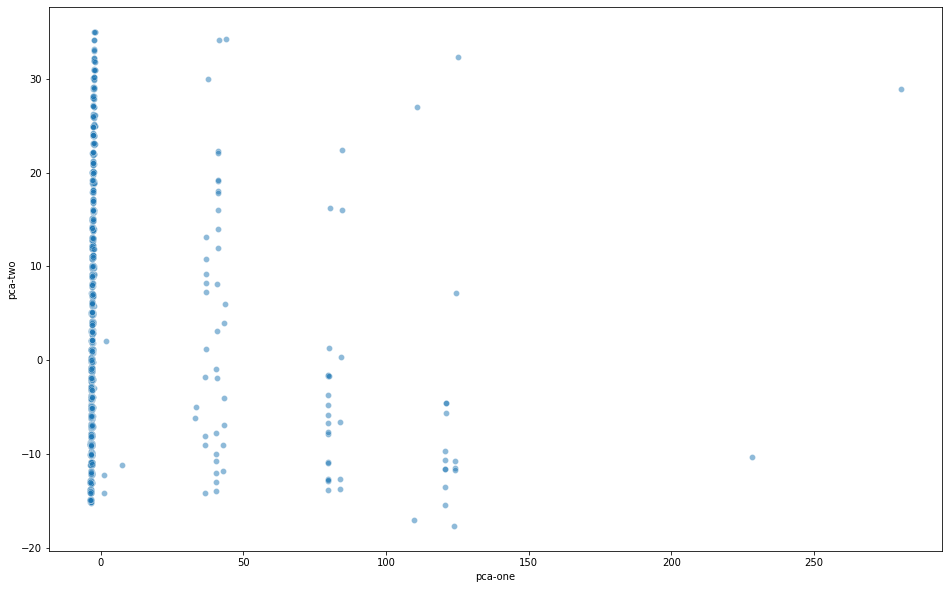

In [42]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='pca-one', y="pca-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.5
)

In [41]:
df

,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,status_single,...,zoo,zookeeper,zoom,zoos,zu,zumba,zurich,zynga,pca-one,pca-two
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,27,66.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.247834,-5.911052
fffe3200,26,68.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.090066,-6.987074
fffe3300,20,69.0,37.804456,-122.271356,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.408584,-13.029876
fffe3400,27,68.0,37.690483,-122.472671,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.411027,-5.984686
fffe3500,22,68.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.362625,-10.995820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,24,69.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.303821,-9.026935
fffe3100390039003800,23,68.0,37.779026,-122.419906,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.477065,-9.973004
fffe3100390039003900,28,71.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.028516,-5.061801


In [44]:
import time
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2001 samples in 4.959s...
[t-SNE] Computed neighbors for 2001 samples in 34.520s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2001
[t-SNE] Computed conditional probabilities for sample 2000 / 2001
[t-SNE] Computed conditional probabilities for sample 2001 / 2001
[t-SNE] Mean sigma: 1.761553
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.017357
[t-SNE] KL divergence after 300 iterations: 1.008356
t-SNE done! Time elapsed: 43.731377840042114 seconds


<AxesSubplot:xlabel='tsne-one', ylabel='tsne-two'>

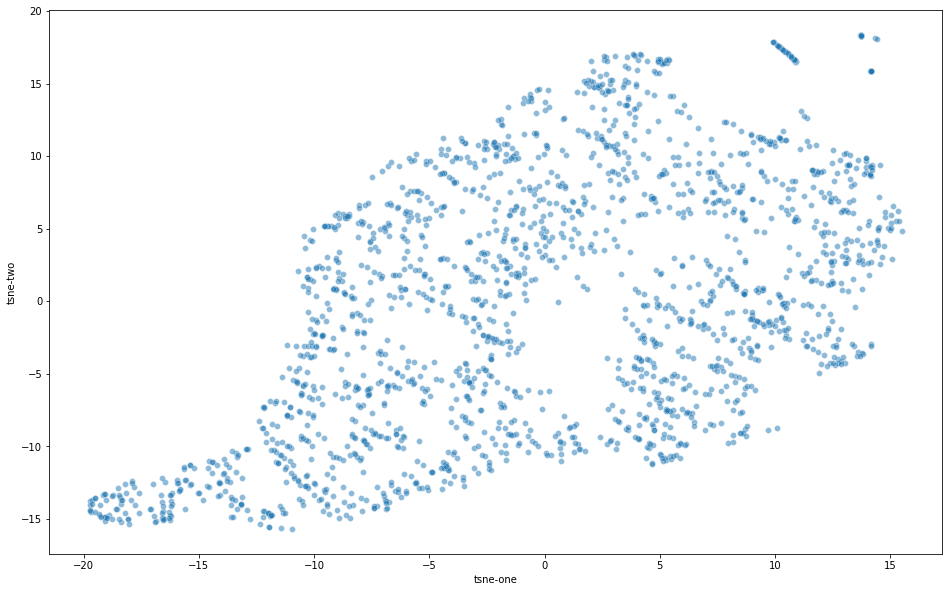

In [47]:
df['tsne-one'] = tsne_results[:,0]
df['tsne-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne-one', y="tsne-two",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.5
)

In [3]:
from sklearn.cluster import KMeans


In [9]:

error=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i).fit(df)
    kmeans.fit(df)
    error.append(kmeans.inertia_)

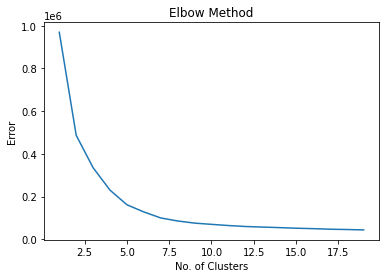

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,20,1),error)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Error')
plt.show()

In [36]:
kmeans5 = KMeans(n_clusters=2)
y_kmeans5 = kmeans5.fit_predict(df)


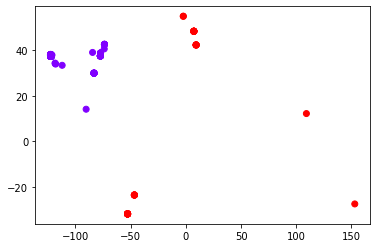

In [37]:
plt.scatter(df['longitude'],df['latitude'],c=y_kmeans5,cmap='rainbow')

# Agglomerative clustering

In [39]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled,columns = df.columns)
data_scaled.head()

,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,status_single,...,zombies,zone,zoo,zookeeper,zoom,zoos,zu,zumba,zurich,zynga
0,0.184205,0.450279,0.257917,-0.834185,0.006822,0.006822,0.0,0.0,0.00000,0.006822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.176671,0.462063,0.257858,-0.829408,0.006795,0.000000,0.0,0.0,0.00000,0.006795,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.136204,0.469905,0.257457,-0.832694,0.006810,0.006810,0.0,0.0,0.00681,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.182904,0.460648,0.255324,-0.829658,0.006774,0.006774,0.0,0.0,0.00000,0.006774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.150020,0.463697,0.257792,-0.833778,0.006819,0.006819,0.0,0.0,0.00000,0.006819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


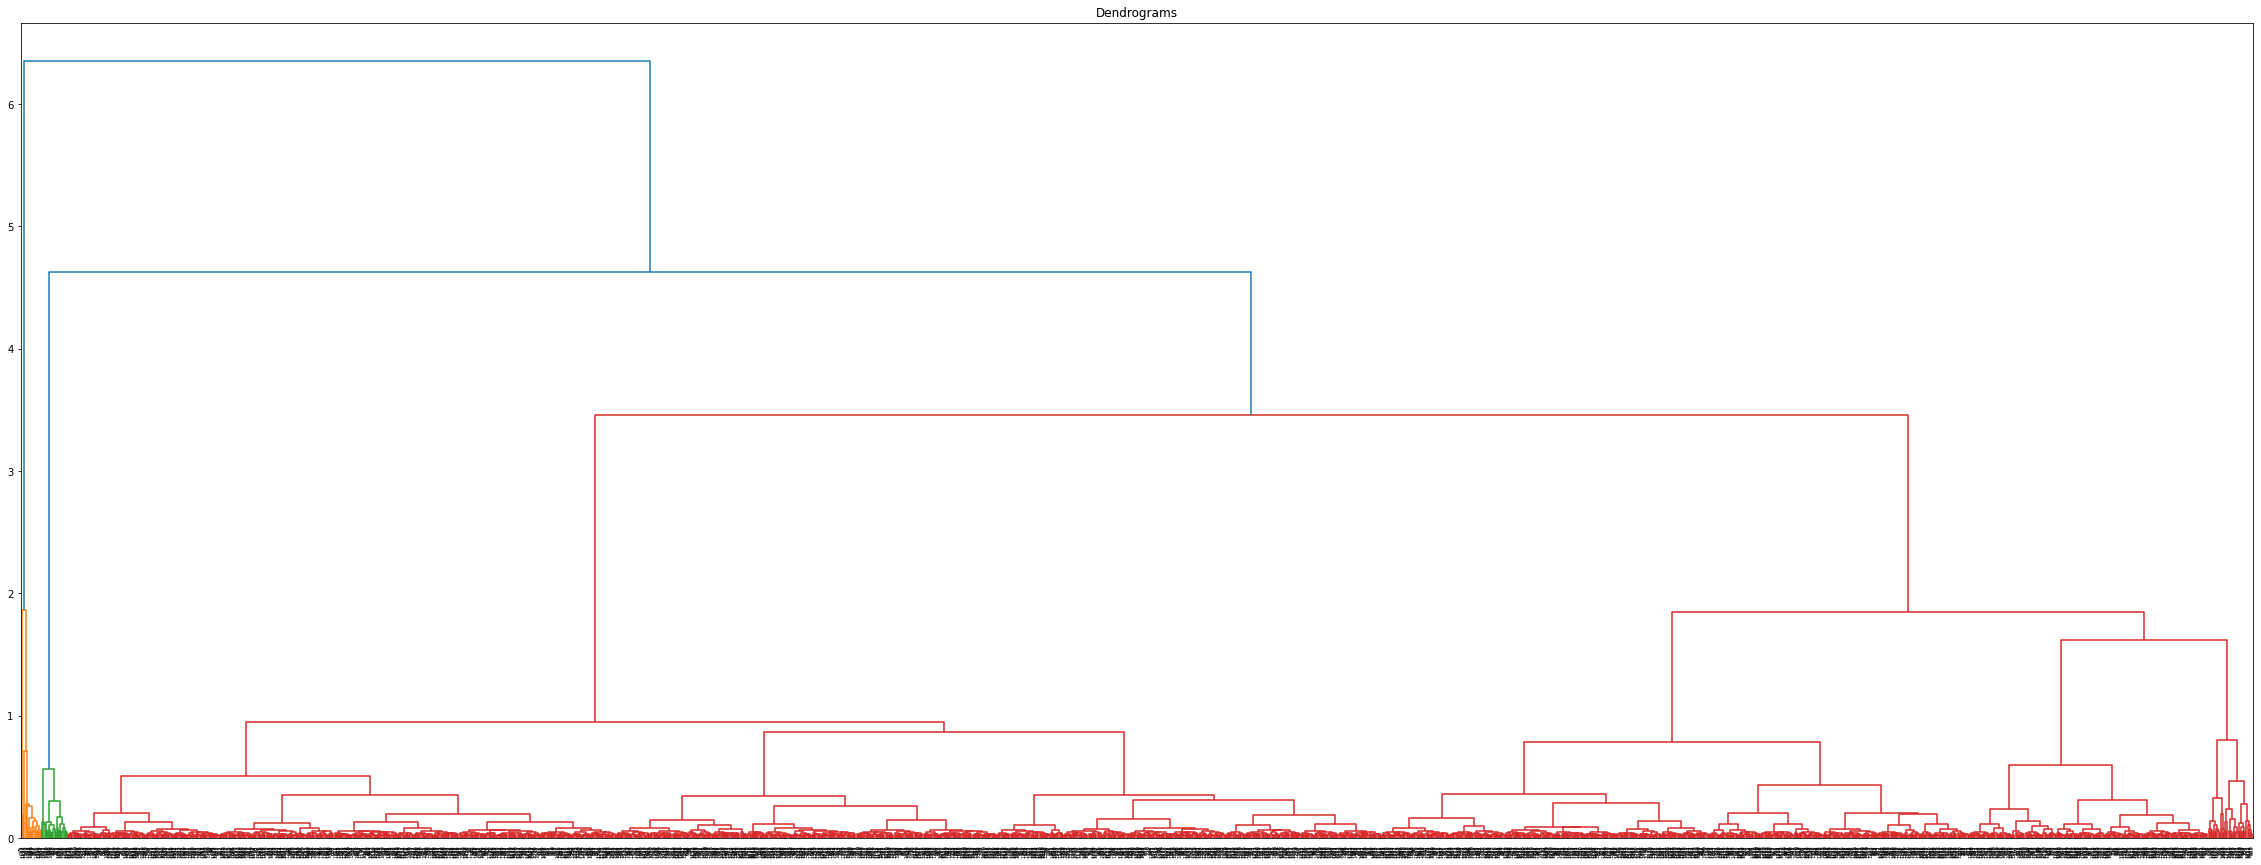

In [62]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(40,15))
plt.title('Dendrograms')
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))

In [65]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='ward')
c=cluster.fit_predict(data_scaled)

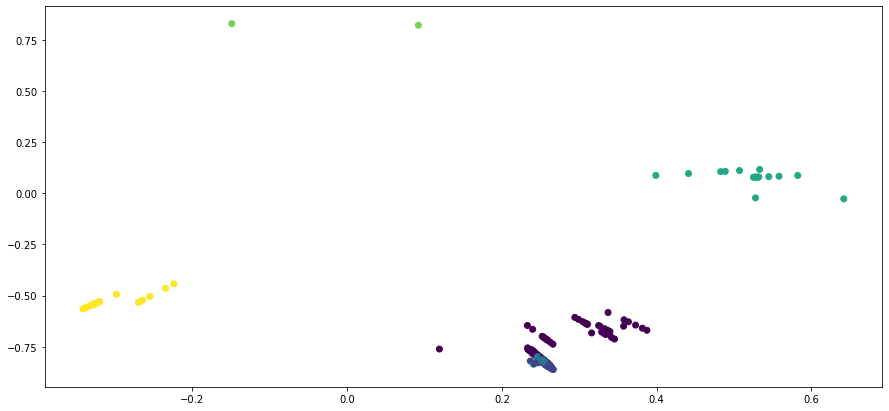

In [64]:
plt.figure(figsize=(15,7))
plt.scatter(data_scaled['latitude'],data_scaled['longitude'],c=cluster.labels_)

In [66]:
data_scaled['cluster #'] = c

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_min_max_scaled = scaler.fit_transform(df)

In [74]:
data_min_max_scaled = pd.DataFrame(data_min_max_scaled,index = df.index,columns = df.columns)


,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,status_single,...,zombies,zone,zoo,zookeeper,zoom,zoos,zu,zumba,zurich,zynga
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.176471,0.392857,0.801994,0.001563,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3200,0.156863,0.464286,0.803646,0.002326,1.0,0.5,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3300,0.039216,0.500000,0.801994,0.001563,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3400,0.176471,0.464286,0.800682,0.000832,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3500,0.078431,0.464286,0.801994,0.001563,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,0.117647,0.500000,0.801994,0.001563,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3100390039003800,0.098039,0.464286,0.801701,0.001024,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3100390039003900,0.196078,0.571429,0.803646,0.002326,1.0,0.5,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(data_min_max_scaled)

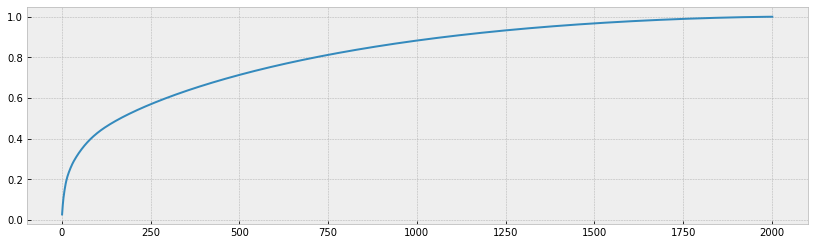

In [101]:
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,df_pca.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

In [102]:
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = df_pca.shape[1] - n_over_95


In [104]:
ori_data.dropna(inplace=True)
pca = PCA(n_components=n_to_reach_95)
df_pca = pca.fit_transform(data_min_max_scaled)


In [106]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
cluster_cnt = [i for i in range(2, 20, 1)]


s_scores = []

db_scores = []


for i in cluster_cnt:
    
    
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
       
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #    Cluster Score
3       0.015745

Min Value:
Cluster #    Cluster Score
8      -0.020592


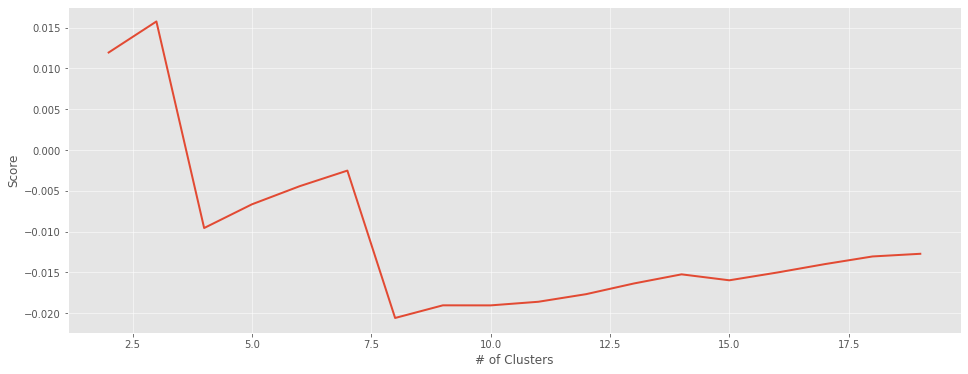

Max Value:
Cluster #    Cluster Score
2       7.185447

Min Value:
Cluster #     Cluster Score
11       4.971591


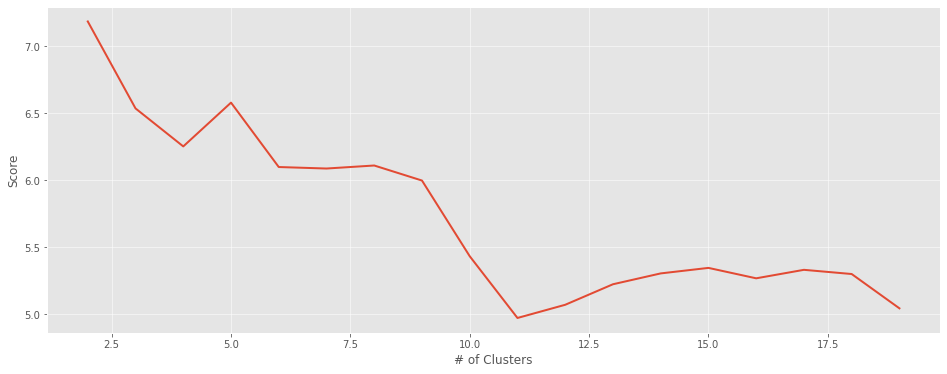

In [107]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [109]:
hac = AgglomerativeClustering(n_clusters=3)
hac.fit(df_pca)
cluster_assignments = hac.labels_




In [112]:
df['cluster #']=cluster_assignments

In [115]:
df_pca = pd.DataFrame(df_pca,index=df.index)

In [117]:
corr_group = df_pca.T.corr()

In [126]:
df.to_csv('clusterdata.csv',index=True)

# experiment 1

In [2]:
df=pd.read_csv('clusterdata.csv')

In [4]:
df['cluster #'].value_counts()

0    848
1    719
2    434
Name: cluster #, dtype: int64

In [12]:
cluster1=df.loc[df['cluster #']==0,'user_id'].tolist()
cluster2=df.loc[df['cluster #']==1,'user_id'].tolist()
cluster3=df.loc[df['cluster #']==2,'user_id'].tolist()

In [13]:
list1 = [cluster1,cluster2]
list2 = [cluster2,cluster3]
list3 = [cluster1,cluster3]

In [14]:
import itertools
c1c2=list(itertools.product(*list1))
c2c3=list(itertools.product(*list2))
c1c3=list(itertools.product(*list3))

In [16]:
c1c2.extend(c2c3)
c1c2.extend(c1c3)

In [18]:
list_to_cluster=pd.DataFrame(c1c2,columns=['user_id_1','user_id_2'])

In [20]:
list_to_cluster.to_csv('list_to_cluster.csv',index=False)

In [3]:
df=df.set_index('user_id')
df

,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,status_single,...,zu marmelade,zu sagen,zu teilen,zu versuchen,zumba,zumba dance,zurich,zurich berlin,zynga,zynga hoodie
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,27,66.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3200,26,68.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3300,20,69.0,37.804456,-122.271356,1,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3400,27,68.0,37.690483,-122.472671,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3500,22,68.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,24,69.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3100390039003800,23,68.0,37.779026,-122.419906,1,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fffe3100390039003900,28,71.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
corr_group = df.T.corr()
corr_group[corr_group<0]=0


In [16]:
for i in range(len(list_to_zero)):
    corr_group[list_to_zero['user_id_1'][i]][list_to_zero['user_id_2'][i]]=0
    corr_group[list_to_zero['user_id_2'][i]][list_to_zero['user_id_1'][i]]=0
'''    
for i in range(len(list_to_cluster)):
    corr_group[list_to_cluster['user_id_1'][i]][list_to_cluster['user_id_2'][i]]=0
    corr_group[list_to_cluster['user_id_2'][i]][list_to_cluster['user_id_1'][i]]=0
'''
    
for i in corr_group.columns:
    corr_group[i][i]=0

In [17]:
corr_group

user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.000000,0.000000,0.998173,0.999432,0.998730,0.998042,0.994448,0.993553,0.000000,0.999022,...,0.000000,0.998535,0.000000,0.985825,0.992157,0.999100,0.999269,0.999060,0.998882,0.995432
fffe3200,0.000000,0.000000,0.998671,0.999547,0.999017,0.998425,0.000000,0.992904,0.999541,0.998586,...,0.992924,0.998940,0.999246,0.984001,0.991365,0.999409,0.000000,0.999419,0.998791,0.994709
fffe3300,0.998173,0.998671,0.000000,0.998407,0.999473,0.999372,0.987853,0.987239,0.999076,0.996694,...,0.987096,0.997097,0.999312,0.976017,0.985148,0.999138,0.999265,0.997894,0.996254,0.989678
fffe3400,0.999432,0.999547,0.998407,0.000000,0.999075,0.998237,0.994036,0.993714,0.999384,0.998639,...,0.993581,0.998979,0.999087,0.985250,0.992259,0.999448,0.999274,0.999421,0.999009,0.995222
fffe3500,0.998730,0.999017,0.999473,0.999075,0.000000,0.999375,0.990125,0.989300,0.999303,0.997664,...,0.989272,0.997654,0.999297,0.979145,0.987383,0.999575,0.999514,0.998521,0.997214,0.991549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,0.999100,0.999409,0.999138,0.999448,0.999575,0.999007,0.991414,0.000000,0.999563,0.000000,...,0.991014,0.000000,0.999459,0.981427,0.000000,0.000000,0.999590,0.000000,0.000000,0.993167
fffe3100390039003800,0.999269,0.000000,0.999265,0.999274,0.999514,0.999232,0.991029,0.990351,0.000000,0.997949,...,0.000000,0.998132,0.000000,0.980535,0.988695,0.999590,0.000000,0.998974,0.997677,0.992539
fffe3100390039003900,0.999060,0.999419,0.997894,0.999421,0.998521,0.997551,0.993555,0.000000,0.999083,0.000000,...,0.993653,0.000000,0.998931,0.985186,0.000000,0.000000,0.998974,0.000000,0.000000,0.995524


In [4]:
from sklearn.metrics.pairwise import cosine_similarity

In [5]:
cos_similar=cosine_similarity(df)

In [6]:
cos_similar = pd.DataFrame(cos_similar,index=df.index,columns=df.index)

In [9]:
cos_similar[cos_similar<0]=0
for i in range(len(list_to_zero)):
    cos_similar[list_to_zero['user_id_1'][i]][list_to_zero['user_id_2'][i]]=0
    cos_similar[list_to_zero['user_id_2'][i]][list_to_zero['user_id_1'][i]]=0
    
for i in cos_similar.columns:
    cos_similar[i][i]=0

In [12]:
cos_similar.to_csv('submission.csv',index=True)


In [10]:
cos_similar

user_id,fffe3100,fffe3200,fffe3300,fffe3400,fffe3500,fffe3600,fffe3700,fffe3800,fffe3900,fffe31003000,...,fffe3100390039003200,fffe3100390039003300,fffe3100390039003400,fffe3100390039003500,fffe3100390039003600,fffe3100390039003700,fffe3100390039003800,fffe3100390039003900,fffe3200300030003000,fffe3200300030003100
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3100,0.000000,0.000000,0.998075,0.999377,0.998674,0.997981,0.994390,0.993470,0.000000,0.998902,...,0.000000,0.998457,0.000000,0.985745,0.992071,0.999045,0.999214,0.999004,0.998809,0.995377
fffe3200,0.000000,0.000000,0.998591,0.999493,0.998962,0.998366,0.000000,0.992823,0.999469,0.998478,...,0.992828,0.998864,0.999181,0.983922,0.991281,0.999356,0.000000,0.999365,0.998718,0.994625
fffe3300,0.998075,0.998591,0.000000,0.998329,0.999397,0.999295,0.987769,0.987123,0.998981,0.996596,...,0.986968,0.996989,0.999225,0.975903,0.985029,0.999061,0.999189,0.997814,0.996153,0.989562
fffe3400,0.999377,0.999493,0.998329,0.000000,0.999027,0.998183,0.993988,0.993645,0.999340,0.998534,...,0.993526,0.998940,0.999030,0.985180,0.992186,0.999403,0.999227,0.999375,0.998973,0.995169
fffe3500,0.998674,0.998962,0.999397,0.999027,0.000000,0.999326,0.990070,0.989215,0.999260,0.997563,...,0.989208,0.997607,0.999238,0.979060,0.987294,0.999528,0.999468,0.998470,0.997173,0.991484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003700,0.999045,0.999356,0.999061,0.999403,0.999528,0.998956,0.991364,0.000000,0.999521,0.000000,...,0.990956,0.000000,0.999401,0.981353,0.000000,0.000000,0.999544,0.000000,0.000000,0.993110
fffe3100390039003800,0.999214,0.000000,0.999189,0.999227,0.999468,0.999183,0.990976,0.990269,0.000000,0.997847,...,0.000000,0.998086,0.000000,0.980452,0.988610,0.999544,0.000000,0.998925,0.997638,0.992477
fffe3100390039003900,0.999004,0.999365,0.997814,0.999375,0.998470,0.997491,0.993511,0.000000,0.999037,0.000000,...,0.993602,0.000000,0.998873,0.985128,0.000000,0.000000,0.998925,0.000000,0.000000,0.995478


In [18]:
corr_group.to_csv('submission.csv',index=True)


In [22]:
df['bio'][1383].tostr()

AttributeError: 'float' object has no attribute 'tostr'

,user_id,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,...,40,41,42,43,44,45,46,47,48,49
0,fffe3100,27,66.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fffe3200,26,68.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fffe3300,20,69.0,37.804456,-122.271356,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fffe3400,27,68.0,37.690483,-122.472671,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fffe3500,22,68.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,fffe3100390039003700,24,69.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,fffe3100390039003800,23,68.0,37.779026,-122.419906,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,fffe3100390039003900,28,71.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,fffe3200300030003000,32,68.0,37.779026,-122.419906,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df=df.set_index('user_id')

,user_id,age,height,latitude,longitude,Dogs,Cats,status_available,status_married,status_seeing someone,...,40,41,42,43,44,45,46,47,48,49
0,fffe3100,27,66.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,fffe3200,26,68.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fffe3300,20,69.0,37.804456,-122.271356,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,fffe3400,27,68.0,37.690483,-122.472671,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fffe3500,22,68.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,fffe3100390039003700,24,69.0,37.804456,-122.271356,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,fffe3100390039003800,23,68.0,37.779026,-122.419906,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,fffe3100390039003900,28,71.0,37.947979,-122.060796,1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,fffe3200300030003000,32,68.0,37.779026,-122.419906,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
